# Import libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
# Visualisation
import matplotlib.pyplot as plt
# Dataset exploring
import os
# Dataset generation
from keras.preprocessing import image_dataset
from keras.preprocessing.image import ImageDataGenerator
# Display images
from IPython.display import Image
# CNN model
from keras.applications import vgg16
# Optimizer
from keras.optimizer_v2 import adam
# Keras layers
from keras.layers import Input, Dense, Dropout, Flatten, AveragePooling2D
# Keras models
from keras.models import Model

# Explore data and Display sample images

In [2]:
# Get labels of training data
labels = os.listdir('input/fruits-fresh-and-rotten-for-classification/dataset/train')
labels

['freshapples', 'rottenapples']


 freshapples


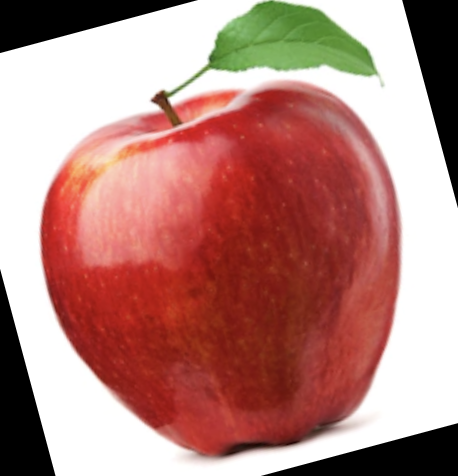

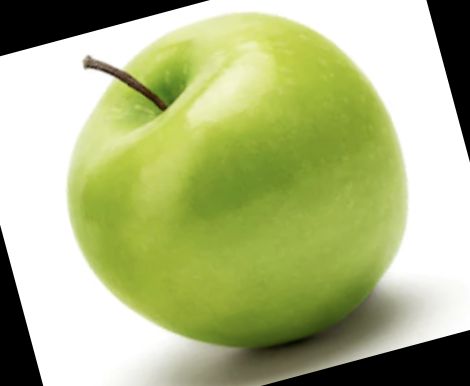


 rottenapples


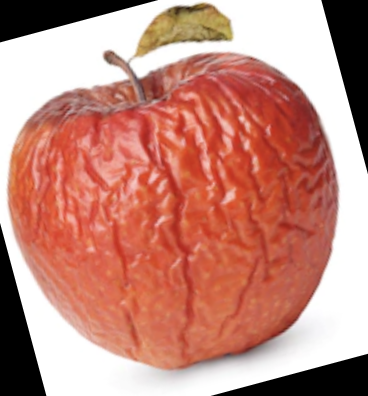

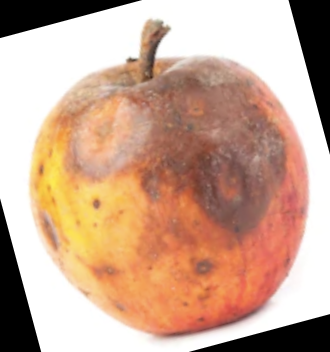


Class                     Number of instances      

freshapples               1693                     
rottenapples              2342                     


In [3]:
num = []
for i in labels:
    path = 'input/fruits-fresh-and-rotten-for-classification/dataset/train/{0}/'.format(i)
    folder_data = os.listdir(path)
    k = 0
    print('\n', i)
    for j in folder_data:
        if(k < 2):
            display(Image(path + j))
        k += 1

    num.append(k)

print()
print('{:<25} {:<25}'.format('Class', 'Number of instances'))
print()
for i in range(len(labels)):
    print('{:<25} {:<25}'.format(labels[i], num[i]))

# Load training and validation data

In [4]:
TRAIN_PATH = 'input/fruits-fresh-and-rotten-for-classification/dataset/train'

datagen = ImageDataGenerator(
    rotation_range = 30, 
    zoom_range = .3, 
    horizontal_flip = True, 
    vertical_flip = True, 
    validation_split = .3
)

train_ds = datagen.flow_from_directory(
    directory = TRAIN_PATH,
    target_size = (256, 256),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'training'
)

validation_ds = datagen.flow_from_directory(
    directory = TRAIN_PATH,
    target_size = (256, 256),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'validation'
)

Found 2826 images belonging to 2 classes.
Found 1209 images belonging to 2 classes.


# Create model architecture

In [5]:
vgg16 = vgg16.VGG16(include_top = False, weights = 'imagenet', input_shape = (256, 256, 3))
vgg16.trainable = False

In [6]:
X_input = Input(shape = (256, 256, 3))
X = vgg16(X_input)
X = AveragePooling2D(pool_size = (3, 3), strides = 2, padding = 'valid',name = 'AvgPool2D')(X)
X = Flatten(name = 'Flatten')(X)
X = Dense(200, activation = 'relu', name = 'Dense1')(X)
X = Dropout(.1)(X)
X = Dense(100, activation = 'relu', name = 'Dense2')(X)
X = Dropout(.1)(X)
X = Dense(2, activation = 'softmax', name = 'Dense3')(X)

model = Model(inputs = X_input, outputs = X, name = 'Apple_Classifer')

print(model.summary())

Model: "Apple_Classifer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
AvgPool2D (AveragePooling2D) (None, 3, 3, 512)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 200)               921800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 100)           

In [7]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_ds, validation_data = validation_ds, epochs = 5, batch_size = 32)

Epoch 1/5
89/89 [==============================] - 843s 9s/step - loss: 2.5135 - accuracy: 0.8074 - val_loss: 0.0809 - val_accuracy: 0.9777
Epoch 2/5
89/89 [==============================] - 801s 9s/step - loss: 0.1928 - accuracy: 0.9388 - val_loss: 0.0557 - val_accuracy: 0.9785
Epoch 3/5
89/89 [==============================] - 820s 9s/step - loss: 0.1395 - accuracy: 0.9634 - val_loss: 0.0410 - val_accuracy: 0.9851
Epoch 4/5
89/89 [==============================] - 820s 9s/step - loss: 0.0942 - accuracy: 0.9718 - val_loss: 0.0672 - val_accuracy: 0.9777
Epoch 5/5
89/89 [==============================] - 815s 9s/step - loss: 0.0796 - accuracy: 0.9748 - val_loss: 0.0265 - val_accuracy: 0.9909


# Show important plots

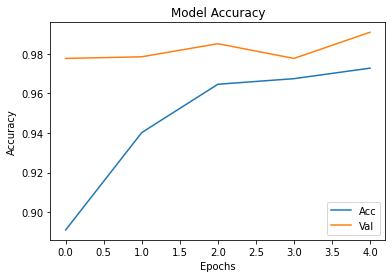

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc', 'Val'], loc = 'lower right')

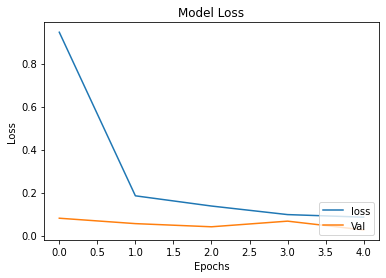

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'Val'], loc = 'lower right')

# Model evaluate using test data

In [10]:
TEST_PATH = 'input/fruits-fresh-and-rotten-for-classification/dataset/test'

test_ds = image_dataset.image_dataset_from_directory(
    TEST_PATH,
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (256, 256)
)

results = model.evaluate(test_ds)

print('{:<25} {:<25}'.format('Test loss', 'Test accuracy'))
print('{:<25} {:<25}'.format(np.round(results[0], 2), np.round(results[1], 2)))

Found 996 files belonging to 2 classes.
32/32 [==============================] - 199s 6s/step - loss: 0.0479 - accuracy: 0.9819
Test loss                 Test accuracy            
0.05                      0.98                     


## Test with fresh red apples only

In [11]:
TEST1_PATH = 'input/fruits-fresh-and-rotten-for-classification/dataset/test_red_apples'

test_ds = image_dataset.image_dataset_from_directory(
    TEST1_PATH,
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (256, 256)
)
results = model.evaluate(test_ds)

print('{:<25} {:<25}'.format('Test loss', 'Test accuracy'))
print('{:<25} {:<25}'.format(np.round(results[0], 2), np.round(results[1], 2)))

Found 243 files belonging to 1 classes.
8/8 [==============================] - 49s 6s/step - loss: 9.9256 - accuracy: 0.9794
Test loss                 Test accuracy            
9.93                      0.98                     


## Test with fresh green apples only

In [12]:
TEST2_PATH = 'input/fruits-fresh-and-rotten-for-classification/dataset/test_green_apples'

test_ds = image_dataset.image_dataset_from_directory(
    TEST2_PATH,
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (256, 256)
)
results = model.evaluate(test_ds)

print('{:<25} {:<25}'.format('Test loss', 'Test accuracy'))
print('{:<25} {:<25}'.format(np.round(results[0], 2), np.round(results[1], 2)))

Found 152 files belonging to 1 classes.
5/5 [==============================] - 30s 6s/step - loss: 10.3682 - accuracy: 1.0000
Test loss                 Test accuracy            
10.37                     1.0                      
